# Analysis for the learning of the 2D dynamics with constant wind and the attack angle (alpha) as only state

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pl 
from matplotlib import cm
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.ticker as ticker
#import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 17
label_fs = 13
legend_fs = 11

## 1) Q matrix

In [2]:
folder = "../"
cQ = pd.read_csv(folder+"cQ_matrix_streamf.txt")
cQ_count = pd.read_csv(folder+"cQ_counter_streamf.txt")
cout = pd.read_csv(folder+"cout_streamf.txt")

#cout = pd.read_csv(folder+"out_eval.txt")
#cpol = pd.read_csv(folder+"cpolicy_streamf.txt")
crew = pd.read_csv(folder+"crewards_streamf.txt")

crew.tail(4)

,episode,epsilon,Alpha,steps,return,penalty
49996,49996,0.0,0.1,2000001,1175.338471,0.0
49997,49997,0.0,0.1,2000001,1175.338471,0.0
49998,49998,0.0,0.1,2000001,1175.338471,0.0
49999,49999,0.0,0.1,2000001,1175.338471,0.0


In [3]:
print(crew.Alpha.unique())
[0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]

[0.6 0.1]


[0, 15000]

In [4]:
print(crew.epsilon.unique())
[0] + [idx for idx, (i, j) in enumerate(zip(crew['epsilon'], crew['epsilon'][1:]), 1) if i != j]

[1.e-03 1.e-04 1.e-05 0.e+00]


[0, 10000, 20000, 49850]

NameError: name 'alphas1' is not defined

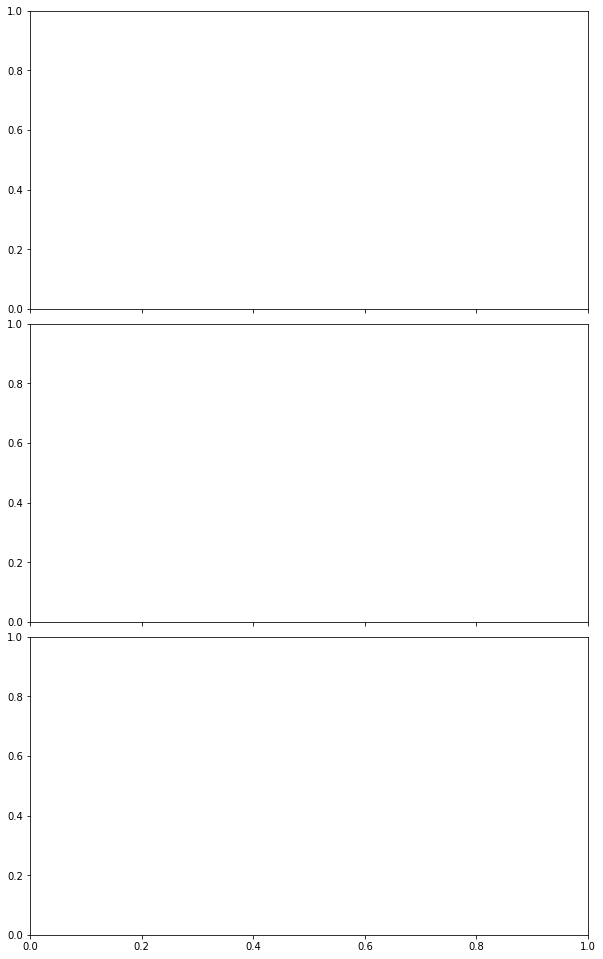

In [5]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10, 17), gridspec_kw={'wspace': 0, 'hspace':0.05})
(ax1, ax2, ax3) = axs
ep_max = cQ['episode'].max()

actions = ['action_0', 'action_1', 'action_2']

colors = ['darkorange', 'rosybrown', 'yellow', 'purple', 'turquoise', 'brown', 'mediumorchid', 'chocolate', 'darkolivegreen', \
         'hotpink', 'dodgerblue', 'green', 'darkslategrey', 'red', 'royalblue']

colors1 = ['darkorange', 'blue', 'yellow', 'purple', 'turquoise', 'brown', 'mediumorchid', 'green', 'darkolivegreen', \
         'hotpink', 'dodgerblue', 'chocolate', 'darkslategrey', 'rosybrown', 'tab:red','royalblue']

for alph in range(0,len(alphas1)):
    
    df = cQ.loc[cQ['alpha_idx'] == alph]
    
    #print(df)
    ax1.plot(df['episode'], df['action_0'], label = str(alphas1[alph]), color = colors1[alph])
    ax2.plot(df['episode'], df['action_1'], label = str(alphas1[alph]), color = colors1[alph])
    ax3.plot(df['episode'], df['action_2'], label = str(alphas1[alph]), color = colors1[alph])
    
    ax1.set_xlim(-2,50001)
    ax2.set_xlim(-2,50001)
    ax3.set_xlim(-2,50001)
    #ax1.set_xticks([0, 10000, 20000, 30000, 40000, 50000])
    
    """ax11 = ax1.twiny()
    ax11.set_xlim(ax1.get_xlim())
    ax11.set_xticks([0, 2500, 5000, 7500, 10000])
    ax11.set_xticklabels([0.1, 0.1, 0.01, 0.001, 0.001])
    ax11.set_xlabel(r'Learning rate $\eta$')
    """
    ax1.set_ylabel(r'Decrease $\alpha$', fontsize = label_fs+5)
    ax2.set_ylabel(r'Keep $\alpha$', fontsize = label_fs+5)
    ax3.set_ylabel(r'Increase $\alpha$', fontsize = label_fs+5)
    
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax3.tick_params(axis='both', which='major', labelsize=14)
    
    #ax1.set_ylim(150,500)
    
    ax1.grid(b=True)
    ax2.grid(b=True)
    ax3.grid(b=True)
    
    ax1.legend(bbox_to_anchor=(1., 1.), fontsize=11.45)
    ax2.legend(bbox_to_anchor=(1., 1.), fontsize=11.45)
    ax3.legend(bbox_to_anchor=(1., 1.), fontsize=11.45)
    
    ax3.set_xlabel('Episode', fontsize = label_fs+5)

#handles, labels = ax3.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.8, 0.5),  fontsize=12, borderaxespad=2)
#fig.legend(handles, labels, bbox_to_anchor=(0.1, 0.5),loc = 'lower right', fontsize=12, borderaxespad=2)
#fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig.savefig('growingmatrix-2d-streamf.png', dpi=200, bbox_inches='tight')

## 2) Rewards

In [ ]:
print(crew.tail(3))

In [ ]:
changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]
print(changes_cart)

## Mean growth of returns

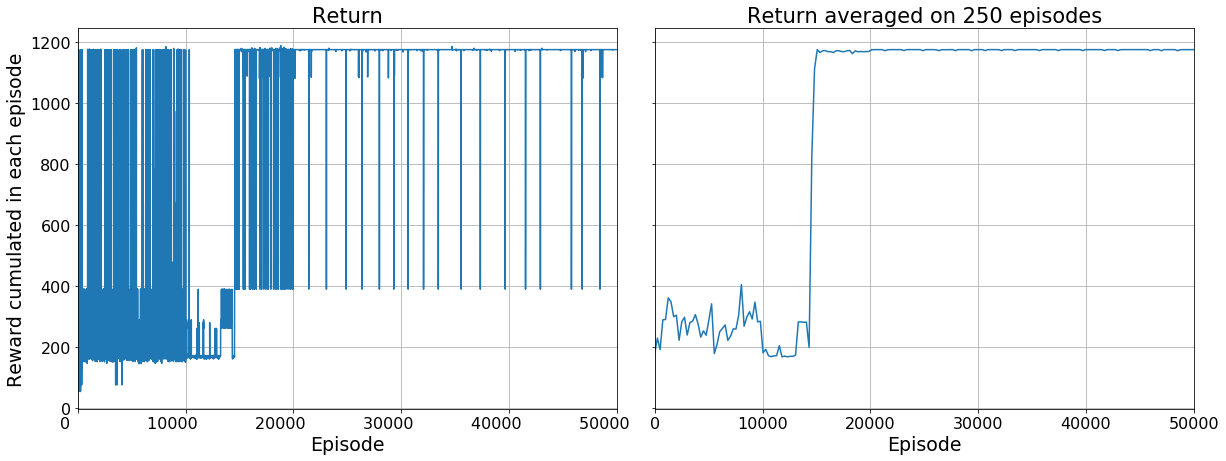

In [15]:
num_blocks = 200
data_per_block = int(len(crew)/num_blocks)

cmean = []
for i in range(0,num_blocks):
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 7), gridspec_kw={'wspace': 0.07})

#fig.suptitle("Return", fontsize = title_fs)

axs[0].plot(crew['episode'], crew['return'])
axs[0].set_title("Return", fontsize=21)
axs[0].grid(b=True)
#axs[0].set_xlim(-0.5, 10000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_ylabel("Reward cumulated in each episode", fontsize=19)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g     ') % (x)))

axs[1].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[1].set_title("Return averaged on " + str(data_per_block) + " episodes", fontsize=21)
axs[1].set_xlabel("Episode", fontsize=19)
axs[1].tick_params(axis='both', labelsize=16)
axs[0].set_xlim(-1, 50001)
axs[1].set_xlim(0, num_blocks)
axs[1].set_xticks([0, 40, 80, 120, 160, 200])
axs[1].set_xticklabels([0,10000, 20000, 30000, 40000, 50000])
axs[1].grid(b=True)

#plt.savefig('returns_streamf_simple.png', bbox_inches='tight')

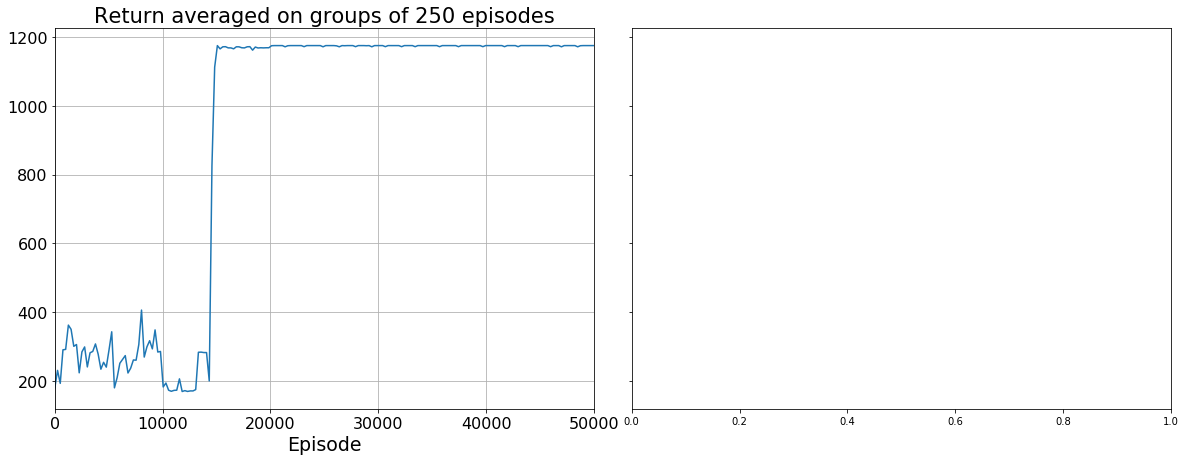

In [16]:
num_blocks = 200
data_per_block = int(len(crew)/num_blocks)

cmean = []
for i in range(0,num_blocks):
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 7), gridspec_kw={'wspace': 0.07})

#fig.suptitle("Return", fontsize = title_fs)

"""axs[0].plot(crew['episode'], crew['return'])
axs[0].set_title("Return", fontsize=21)
axs[0].grid(b=True)
#axs[0].set_xlim(-0.5, 10000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_ylabel("Reward cumulated in each episode", fontsize=19)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g     ') % (x)))"""

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].set_title("Return averaged on groups of " + str(data_per_block) + " episodes", fontsize=21)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_xlim(-1, 50001)
axs[0].set_xlim(0, num_blocks)
axs[0].set_xticks([0, 40, 80, 120, 160, 200])
axs[0].set_xticklabels([0,10000, 20000, 30000, 40000, 50000])
axs[0].grid(b=True)

#plt.savefig('returns_avg.png', bbox_inches='tight', dpi=200)

In [6]:
cQ_last = cQ[cQ['episode'] == cQ.episode.max()]

In [7]:
choice = {}

#print(val)
list_tmp = []
#if (i == 8):
cQ_tmp = cQ_last
for j, val in cQ_tmp.iterrows():
    #print("j=", j, val[0], val[1], val[2], val[3])
    Q_values_alphas = [val[1], val[2], val[3]]
    #print(j, "val = ",Q_values_alphas)
    m_index, m_value = max(enumerate(Q_values_alphas), key=operator.itemgetter(1))
    if (val[0] == 0):
        if (m_index == 0):
            m_index = 1
    if (val[0] == len(alphas)-1):
        if (m_index == 2):
            m_index = 1
    #print("m idx", m_index, "m_val",m_value)
    list_tmp.append(m_index)
    choice[i] = list_tmp


NameError: name 'operator' is not defined

In [ ]:
import seaborn as sns
df_plot = pd.DataFrame(choice)
fig, ax = plt.subplots(ncols=1, gridspec_kw=dict(width_ratios=[7]),figsize=(21,7))

sns.set(font_scale=1.1)
sns.heatmap(df_plot, cmap="Blues", ax=ax, annot=True, fmt='g', cbar_kws={"boundaries": np.linspace(0, 2, 4)}, 
            linewidths=0.01, linecolor='k')
ax.set_xticklabels(angles_values1)
for axis in [ax.xaxis]:
    axis.set(ticks=np.arange(-0., len(angles_values1)), ticklabels=angles_values1)
    
ax.set_yticklabels(alphas, rotation='horizontal')
colorbar = ax.collections[0].colorbar
print(colorbar)
colorbar.set_ticks([0.35, 1, 1.65])
colorbar.set_ticklabels(['0: Decrease', '1: Stay', '2: Increase'])
colorbar.ax.tick_params(labelsize=16)

ax.set_ylabel('Attack angles', fontsize=17)
ax.set_xlabel(r'$\beta$ interval', fontsize=17, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)


## 4) last episode dynamics and policy

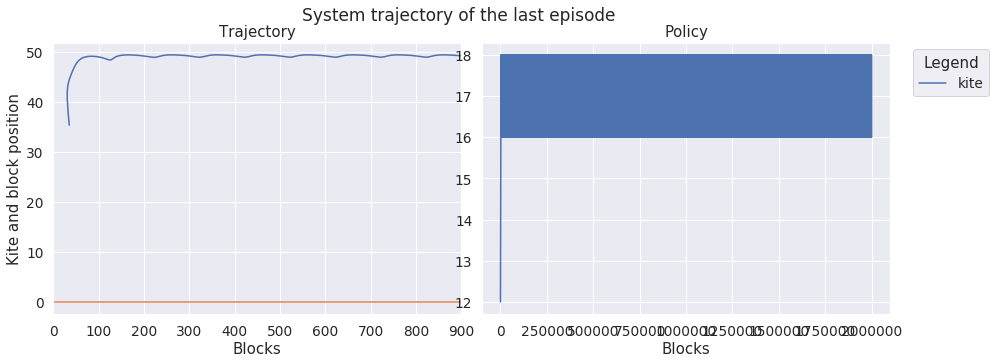

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.05})

fig.suptitle('System trajectory of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(cpol['step'], cpol['alpha'],label='kite')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Trajectory")
axs[1].set_title("Policy")

axs[0].set_xlim(0,900)

for ax in axs.flat:
    ax.set(xlabel='Blocks')

#fig.savefig('system_trajectory_streamfunction.png', dpi=400)

No handles with labels found to put in legend.


NameError: name 'cpol' is not defined

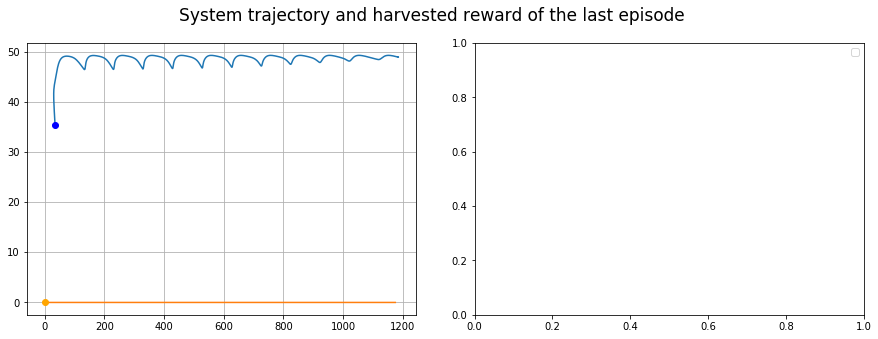

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.15})

fig.suptitle('System trajectory and harvested reward of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'], label='kite')
axs[0].plot(cout['x_kite'][0], cout['z_kite'][0], marker='o', color='b')
axs[0].plot(cout['x_block'], cout['z_block'], label='block')
axs[0].plot(cout['x_block'][0]+0.05, cout['z_block'][0], marker='o', color='orange')
axs[0].grid(b=True)
plt.legend( loc="upper right")

axs[1].plot(cout['x_block'], cpol['reward'])
axs[1].grid(b=True)

axs[0].set_xlim(-2.2,3100)
axs[1].set_xlim(-2,3100)

axs[0].legend(loc=4,mode="", borderaxespad=.5, frameon=True,
        bbox_to_anchor=(-0.02, 0.72, 1., .102), fontsize=legend_fs+2)

#axs[0].set_title("Trajectory")
#axs[1].set_title("Instantaneous reward")

axs[0].set_ylabel("Kite and Block position", fontsize=17, labelpad=-1)
axs[1].set_ylabel("Instantanous block velocity", fontsize=17, labelpad=-1)

for ax in axs.flat:
    ax.set(xlabel='x (m)')

#fig.savefig('trajectory_reward_streamf.png', dpi=400, bbox_inches = 'tight')

## 6) Q matrix counter

In [12]:
cQ.episode.unique()

array([    0,   125,   250,   375,   500,   625,   750,   875,  1000,
        1125,  1250,  1375,  1500,  1625,  1750,  1875,  2000,  2125,
        2250,  2375,  2500,  2625,  2750,  2875,  3000,  3125,  3250,
        3375,  3500,  3625,  3750,  3875,  4000,  4125,  4250,  4375,
        4500,  4625,  4750,  4875,  5000,  5125,  5250,  5375,  5500,
        5625,  5750,  5875,  6000,  6125,  6250,  6375,  6500,  6625,
        6750,  6875,  7000,  7125,  7250,  7375,  7500,  7625,  7750,
        7875,  8000,  8125,  8250,  8375,  8500,  8625,  8750,  8875,
        9000,  9125,  9250,  9375,  9500,  9625,  9750,  9875, 10000,
       10125, 10250, 10375, 10500, 10625, 10750, 10875, 11000, 11125,
       11250, 11375, 11500, 11625, 11750, 11875, 12000, 12125, 12250,
       12375, 12500, 12625, 12750, 12875, 13000, 13125, 13250, 13375,
       13500, 13625, 13750, 13875, 14000, 14125, 14250, 14375, 14500,
       14625, 14750, 14875, 15000, 15125, 15250, 15375, 15500, 15625,
       15750, 15875,

In [18]:
last_ep = cQ.episode.max()
ep = 46875
cQ_last = cQ[cQ['episode'] == ep]
cQ_count_last = cQ_count[cQ_count['episode'] == ep]

cQ_count.head(5)

,episode,alpha_idx,action_0,action_1,action_2
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0


In [19]:
df1 = cQ_last[['action_0','action_1', 'action_2']]

polic = {}
for a, row in enumerate(df1.iterrows()):
    #print(a, row)
    m_tmp = 0
    for i in range(3):
        if (row[1][i] > row[1][m_tmp]):
            m_tmp = i
    polic[a] = m_tmp
    #print("zero,",row[1][1], "\n\n")
    
polic

{0: 0,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 1}

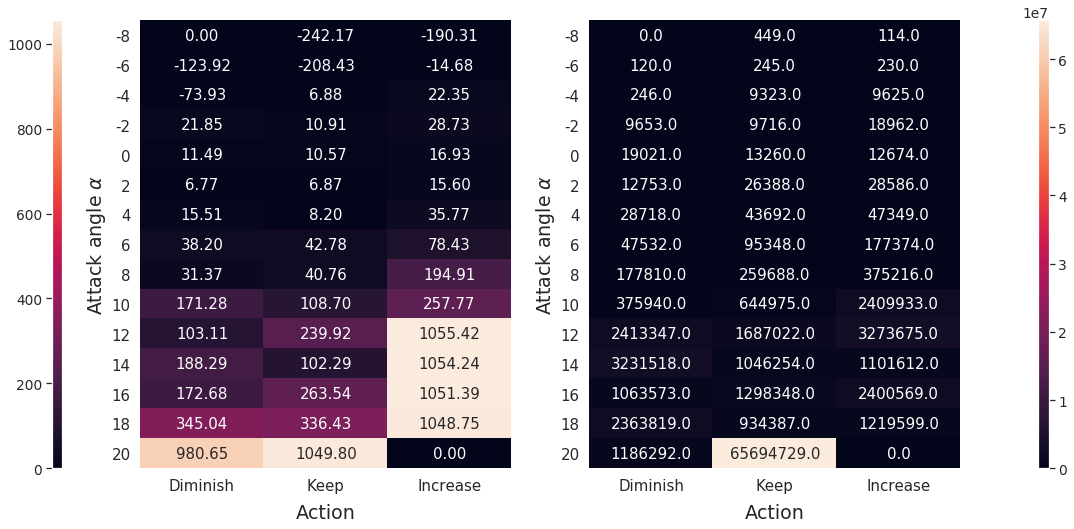

In [20]:
import seaborn as sns

df1 = cQ_last[['action_0','action_1', 'action_2']]
df3 = cQ_count_last[['action_0','action_1', 'action_2']]

vmin = 0

sns.set(font_scale=1.25)

fig, axs = plt.subplots(1, ncols=4, #sharex=True, 
                        gridspec_kw=dict( width_ratios=[0.2,7,7,0.2], height_ratios=[1]), 
                        figsize=(15, 7.5))

sns.heatmap(df1, annot=True, fmt=".2f", cbar=False, ax=axs[1], vmin=vmin)
sns.heatmap(df3, annot=True, fmt=".1f", cbar=False, ax=axs[2], vmin=vmin)

axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[2].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_yticklabels(alphas,rotation='horizontal')
axs[2].set_yticklabels(alphas,rotation='horizontal')

axs[1].set_xlabel("Action",fontsize=19, labelpad=10)
axs[2].set_xlabel("Action",fontsize=19, labelpad=10)

axs[1].tick_params(labelsize=15)
axs[2].tick_params(labelsize=15)

axs[1].set_ylabel(r'Attack angle $\alpha$',fontsize=19)
axs[2].set_ylabel(r'Attack angle $\alpha$',fontsize=19)

fig.colorbar(axs[1].collections[0], cax=axs[0], fraction=0.046,pad=1)
axs[0].yaxis.set_ticks_position('left')
fig.tight_layout() 
fig.colorbar(axs[2].collections[0], cax=axs[3])

#fig.savefig('matrix-and-counter_streamfunction.png', bbox_inches='tight', dpi=200)

# Streamfucntion plot

0.06283185307179587


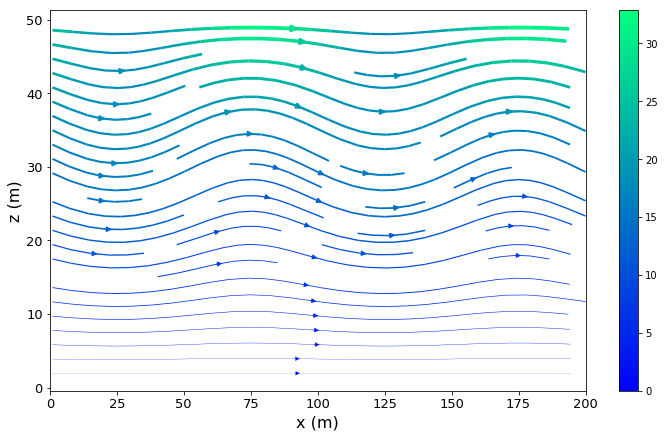

In [5]:
Y, X = np.mgrid[0:50:100j, 1:200:100j]

epsilon_wind = 0.2
Lx = 50
Ly = 50
k_wind = 0.5

print(np.pi/Lx)


U = 0.5*k_wind*Y*(2*epsilon_wind*np.sin(np.pi*X/Lx)*np.sin(np.pi*Y/Ly) + \
        epsilon_wind*np.pi*Y/Ly*np.sin(np.pi*X/Lx)*np.cos(np.pi*Y/Ly) + 2)

V = -k_wind*epsilon_wind*np.pi*Y*Y/(2*Lx)*np.cos(np.pi*X/Lx)*np.sin(np.pi*Y/Ly)

speed = np.sqrt(U*U + V*V)
lw = 4*speed/speed.max()


Uold = k_wind*Y*(1+epsilon_wind*np.sin(np.pi*X/Lx)*np.cos(np.pi*Y/Ly)*np.pi/Ly)

Vold = -(k_wind*Y*Y/2*epsilon_wind*np.sin(np.pi*Y/Ly)*np.cos(np.pi*X/Lx))

#U = Uold
#V = Vold

plt.figure(figsize=(12,7))
plt.streamplot(X, Y, U, V,  density=0.9, color=U, linewidth=lw, cmap=plt.cm.winter)
plt.ylabel("z (m)", fontsize=16)
plt.xlabel("x (m)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.colorbar()

plt.xlim(0,200)
#f, (ax1, ax2) = plt.subplots(ncols=2)
#ax1.streamplot(X, Y, U, V, density=[0.5, 1] )   
#ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)#

#plt.show()
#plt.savefig("streamfunction_epsilon02.png", bbox_inches='tight')#

In [62]:
a = 12.5
b = -12.5
print(a/Lx)
print(1/4)
print(np.cos(np.pi*a/Lx))
print(np.cos(np.pi/4))
-k_wind*epsilon_wind*np.pi*50*50/(2*Lx)*np.cos(np.pi*a/Lx)*np.sin(np.pi*b/Ly)

0.25
0.25
0.7071067811865476
0.7071067811865476


1.9634954084936205

In [7]:
cout = pd.read_csv(folder+"out_eval.txt")

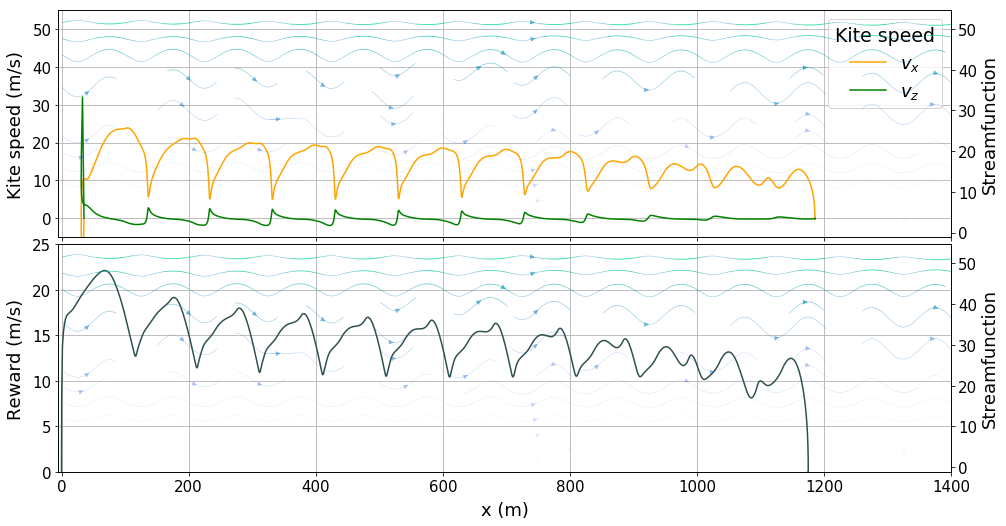

In [8]:
# ======> CHOOSE THE EPISODE!!!
cout1 = cout#.loc[cout['episode'] == 44250]


Y, X = np.mgrid[0:55:100j, 1:1500:100j]

epsilon_wind = 0.2
Lx = 50
Ly = 50
k_wind = 0.5

U = 0.5*k_wind*Y*(2*epsilon_wind*np.sin(np.pi*X/Lx)*np.sin(np.pi*Y/Ly) + \
        epsilon_wind*np.pi*Y/Ly*np.sin(np.pi*X/Lx)*np.cos(np.pi*Y/Ly) + 2)

V = -k_wind*epsilon_wind*np.pi*Y*Y/(2*Lx)*np.cos(np.pi*X/Lx)*np.sin(np.pi*Y/Ly)


cmap = pl.cm.winter
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
#print("cmap, ", my_cmap)
#print(len(my_cmap))
# Create new colormap
my_cmap = ListedColormap(my_cmap)

speed = np.sqrt(U*U + V*V)
lw = speed/speed.max()

fig, ax = plt.subplots(2, 1,  gridspec_kw={'hspace': 0.03}, sharex=True,figsize=(16, 8.5))

#ax[0].plot(cout1['x_kite'], cout1['vkmod'], color='darkslategrey')
ax[0].plot(cout1['x_kite'], cout1['vkx'], color='orange', label=r'$v_x$')
ax[0].plot(cout1['x_kite'], cout1['vkz'], color='green', label=r'$v_z$')
ax[1].plot(cout1['x_block'], cout1['reward']*10, color='darkslategrey')

ax2 = ax[0].twinx()
ax3 = ax[1].twinx()
ax2.set_ylabel("Streamfunction", fontsize=18)
ax3.set_ylabel("Streamfunction", fontsize=18)
ax2.streamplot(X, Y, U, V,  density=0.5, color=U, linewidth=lw, cmap=my_cmap)
ax3.streamplot(X, Y, U, V,  density=0.5, color=U, linewidth=lw, cmap=my_cmap)

ax[0].set_ylabel("Kite speed (m/s)", fontsize=18, labelpad=7)
ax[1].set_ylabel("Reward (m/s)", fontsize=18, labelpad=7)

ax[1].set_xlabel("x (m)", fontsize=18, labelpad=7)

ax[0].set_xlim(-5, 1400)
ax[0].grid(False)
ax[0].set_ylim(-5, 55)
ax[1].set_ylim(-0.001, 25)

ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(title = 'Kite speed', title_fontsize=19, fontsize = 18)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig("streamfunction_speed_ok.png", bbox_inches='tight')

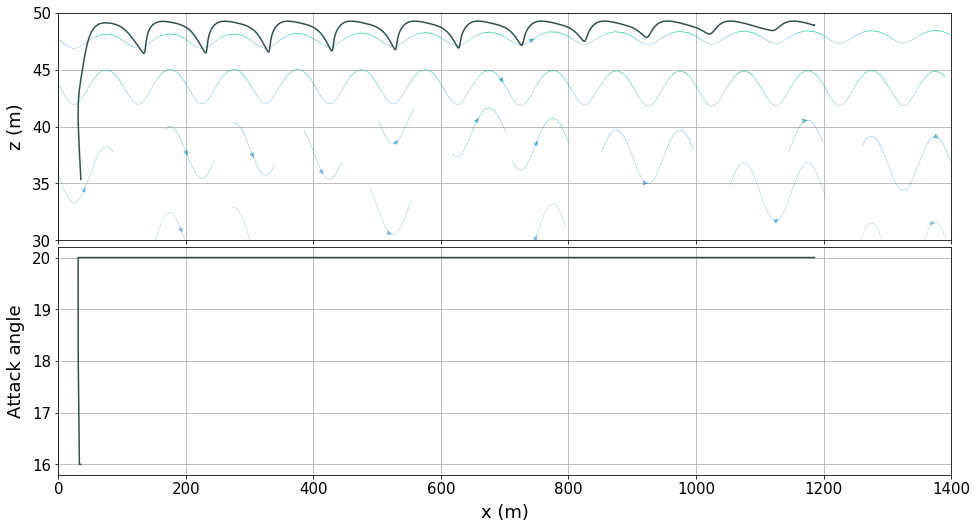

In [9]:
# ======> CHOOSE THE EPISODE!!!
cout1 = cout#.loc[cout['episode'] == 44250]


Y, X = np.mgrid[0:55:100j, 1:1500:100j]

epsilon_wind = 0.2
Lx = 50
Ly = 50
k_wind = 0.5

U = 0.5*k_wind*Y*(2*epsilon_wind*np.sin(np.pi*X/Lx)*np.sin(np.pi*Y/Ly) + \
        epsilon_wind*np.pi*Y/Ly*np.sin(np.pi*X/Lx)*np.cos(np.pi*Y/Ly) + 2)

V = -k_wind*epsilon_wind*np.pi*Y*Y/(2*Lx)*np.cos(np.pi*X/Lx)*np.sin(np.pi*Y/Ly)


cmap = pl.cm.winter
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

my_cmap = ListedColormap(my_cmap)

speed = np.sqrt(U*U + V*V)
lw = speed/speed.max()

fig, ax = plt.subplots(2, 1,  gridspec_kw={'hspace': 0.03}, sharex=True, figsize=(16, 8.5))


ax[0].plot(cout1['x_kite'], cout1['z_kite'], color='darkslategrey')
ax[0].plot(cout1['x_block'], cout1['z_block'], color='darkslategrey')
ax[1].plot(cout1['x_kite'], cout1['alpha'], color='darkslategrey')

#ax3 = ax[1].twinx()
ax[0].streamplot(X, Y, U, V,  density=0.5, color=U, linewidth=lw, cmap=my_cmap)

ax[0].set_ylabel("z (m)", fontsize=18, labelpad=7)

ax[1].set_xlabel("x (m)", fontsize=18, labelpad=7)
ax[1].set_ylabel("Attack angle", fontsize=18, labelpad=7)

ax[0].set_xlim(0, 1400)
ax[0].grid(False)
ax[0].set_ylim(30, 50)

ax[0].grid(True)
ax[1].grid(True)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)

#plt.savefig("streamfunction_traj_attack.png", bbox_inches='tight')

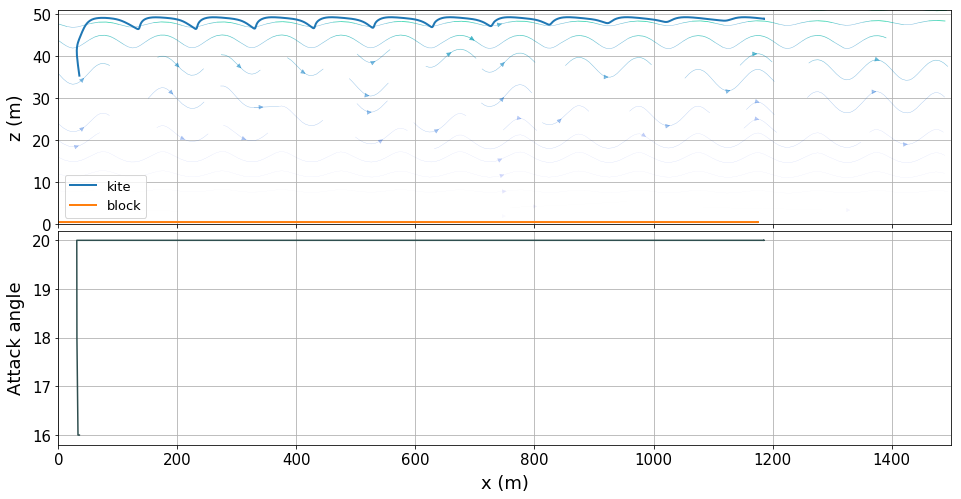

In [11]:
fig, ax = plt.subplots(2, 1,  gridspec_kw={'hspace': 0.03}, sharex=True,figsize=(16, 8))

ax[0].plot(cout1['x_kite'], cout1['z_kite'], linewidth=2, label='kite')
ax[0].plot(cout1['x_block'], cout1['z_block']+0.5, linewidth=2, label='block')
ax[1].plot(cout1['x_kite'], cout1['alpha'], color='darkslategrey')
#ax[2].plot(cout1['x_kite'], idx_to_angle(cout1['s_vrel_angle']), color='darkslategrey')
#ax[2].plot(cout1['x_kite'], idx_to_angle(cout1['s_vrel_angle']), 'o', color='darkslategrey', markersize=5)

#ax[0].set_xticks([i for i in range(30,1500,100)])
#ax[0].set_xticks([i for i in range(0,1500,100)])
#ax2 = ax[0].twinx()
#ax3 = ax[1].twinx()
ax[0].streamplot(X, Y, U, V,  density=0.5, color=U, linewidth=lw, cmap=my_cmap)#cmap=my_cmap)
#ax3.streamplot(X, Y, U, V,  density=0.5, color=U, linewidth=lw, cmap=my_cmap)

ax[0].set_ylabel("z (m)", fontsize=18, labelpad=7)
ax[1].set_xlabel("x (m)", fontsize=18, labelpad=7)
ax[1].set_ylabel("Attack angle", fontsize=18, labelpad=7)

ax[0].set_xlim(0, 1500)
ax[0].set_ylim(0, 51)
ax[1].grid(False)

ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(fontsize=13)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
#plt.savefig("presentation2.png", bbox_inches='tight')

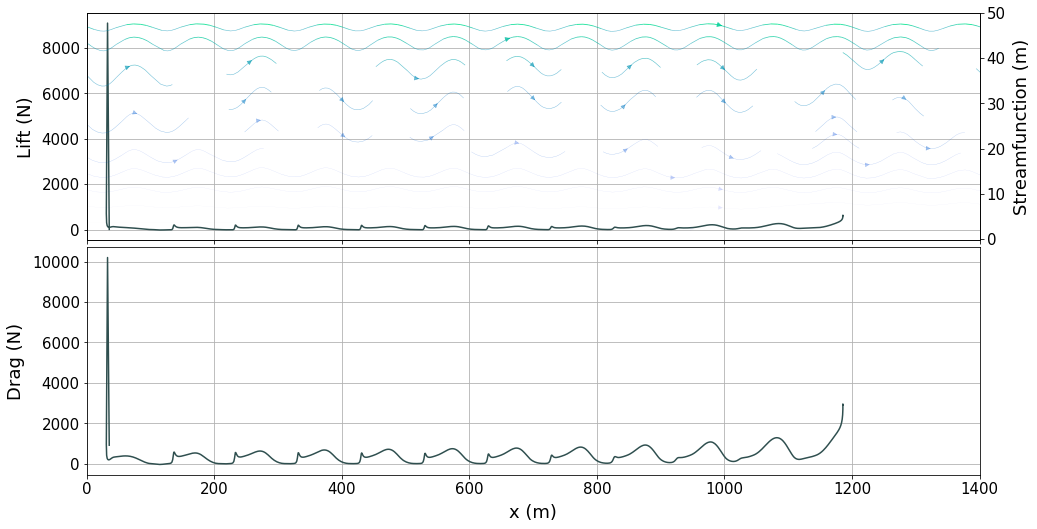

In [89]:
cout1 = cout

Y, X = np.mgrid[0:50:100j, 1:2000:100j]

epsilon_wind = 0.2
Lx = 50
Ly = 50
k_wind = 0.5

U = 0.5*k_wind*Y*(2*epsilon_wind*np.sin(np.pi*X/Lx)*np.sin(np.pi*Y/Ly) + \
        epsilon_wind*np.pi*Y/Ly*np.sin(np.pi*X/Lx)*np.cos(np.pi*Y/Ly) + 2)

V = -k_wind*epsilon_wind*np.pi*Y*Y/(2*Lx)*np.cos(np.pi*X/Lx)*np.sin(np.pi*Y/Ly)


cmap = pl.cm.winter

my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

speed = np.sqrt(U*U + V*V)
lw = speed/speed.max()

fig, ax = plt.subplots(2, 1,  gridspec_kw={'hspace': 0.03}, sharex=True,figsize=(16, 8.5))

ax[0].plot(cout1['x_kite'], cout1['lxdx'], color='darkslategrey')
ax[1].plot(cout1['x_kite'], cout1['lzdz'], color='darkslategrey')

ax2 = ax[0].twinx()

ax2.streamplot(X, Y, U, V,  density=0.5, color=U, linewidth=lw, cmap=my_cmap)
ax[1].set_xlabel("x (m)", fontsize=18, labelpad=7)
ax[0].set_ylabel("Lift (N)", fontsize=18, labelpad=7)
ax[1].set_ylabel("Drag (N)", fontsize=18, labelpad=7)
ax2.set_ylabel("Streamfunction (m)", fontsize=18, labelpad=7)

ax[0].grid(False)
ax2.set_xlim(0, 1400)
ax3.set_xlim(0, 1400)


ax[0].grid(True)
ax[1].grid(True)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
